# Chapter 3

### Our first TensorFlow graph

In [1]:
import tensorflow as tf 
a = tf.constant(5) 
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b) 
e = tf.add(c,b) 
f = tf.subtract(d,e) 
sess = tf.Session() # 그래프 실행환경과 연결하며, 중간 결과 저장 및 최종 결과 산출
outs = sess.run(f) # 출력이 나와야하는 노드에서 시작하여 역방향으로 처리하여 의존관계 집합에 따라 실행되어야 하는 노드의 연산 수행
sess.close() 
print("outs = {}".format(outs))

outs = 5


In [17]:
# 예제1
a = tf.constant(-5) 
b = tf.constant(10)
c = tf.multiply(a,b)
d = tf.add(a,b) 
e = tf.subtract(c,d) 
f = tf.add(c,d) 
g = tf.div(e,f) 
sess = tf.Session() 
outs = sess.run(g)
sess.close() 
print("outs = {}".format(outs))

# 예제2
a = tf.constant(1.0) 
b = tf.constant(5.0)
c = tf.multiply(a,b)
d = tf.sin(c)
e = tf.div(d,b)
sess = tf.Session() 
outs = sess.run(e)
sess.close() 
print("outs = {}".format(outs))

outs = 1
outs = -0.19178485870361328


### Constructing and managing our graph 

In [2]:
import tensorflow as tf
print(tf.get_default_graph())

g = tf.Graph()
print(g)

#### Graph
A Graph contains a set of tf.Operation objects, which represent units of computation; and tf.Tensor objects, which represent the units of data that flow between operations.

https://www.tensorflow.org/api_docs/python/tf/Graph

In [3]:
a = tf.constant(5) 

print(a.graph is g)
print(a.graph is tf.get_default_graph())

False
True


In [32]:
g1 = tf.get_default_graph() 
g2 = tf.Graph() 

print(g1 is tf.get_default_graph())

with g2.as_default(): 
    print(g1 is tf.get_default_graph())

print(g1 is tf.get_default_graph())

True
False
True


In [4]:
g = tf.Graph()
with g.as_default():
  # Define operations and tensors in `g`.
    c = tf.constant(30.0)
    print(c.graph is g)

True


### Fetches 

In [5]:
a = tf.constant(5) 
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b) 
e = tf.add(c,b) 
f = tf.subtract(d,e) 

with tf.Session() as sess: # with 를 통해 모든 연산이 마치면 자동으로 세션 종료
    fetches = [a,b,c,d,e,f] # 요청할 노드들이 담긴 리스트를 넘겨, 여러 노드의 출력 요청
    # 의존관계 집합에 따라 필요한 노드만 연산, 그래프의 전체 크기나 복잡도에 상관없이 필요한 일부분만 실행
    outs = sess.run(fetches) 

print("outs = {}".format(outs))
print(type(outs[0]))

outs = [5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


### Nodes are operations, edges are Tensor objects  

In [36]:
c = tf.constant(4.0)
print(c)

Tensor("Const_44:0", shape=(), dtype=float32)


### Data types  

In [37]:
c = tf.constant(4.0, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_45:0", shape=(), dtype=float64)
<dtype: 'float64'>


In [38]:
x = tf.constant([1,2,3],name='x',dtype=tf.float32) 
print(x.dtype)
x = tf.cast(x,tf.int64)
print(x.dtype)

<dtype: 'float32'>
<dtype: 'int64'>


### Tensor arrays and Shapes  

In [39]:
import numpy as np 

c = tf.constant([[1,2,3],
                 [4,5,6]]) 
print("Python List input: {}".format(c.get_shape()))

c = tf.constant(np.array([
                 [[1,2,3], 
                  [4,5,6]], 

                 [[1,1,1], 
                  [2,2,2]]
                 ])) 

print("3d Numpy array input: {}".format(c.get_shape()))

Python List input: (2, 3)
3d Numpy array input: (2, 2, 3)


(1, 50000)


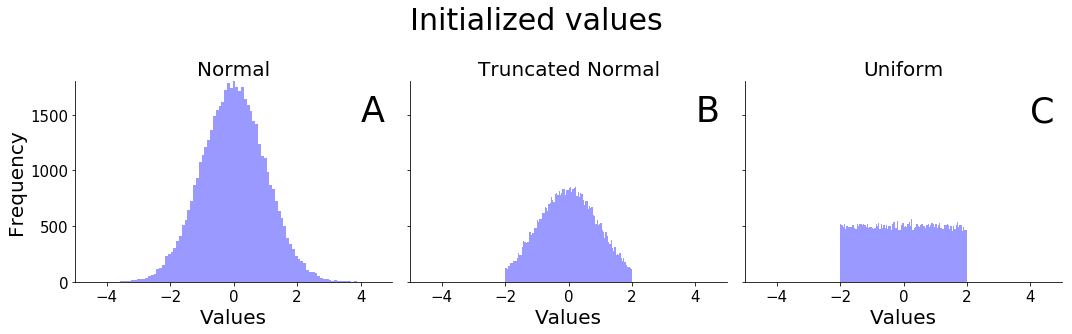

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

sess = tf.InteractiveSession()

# === Noramal and Truncated normal distributions ===
mean = 0
std = 1
x_normal = tf.random_normal((1,50000),mean,std).eval()
x_truncated = tf.truncated_normal((1,50000),mean,std).eval()

# === Uniform distribution
minval = -2 
maxval = 2
x_uniform = tf.random_uniform((1,50000),minval,maxval).eval()

sess.close()


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#     ax.set_ylim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,3,figsize=[15,4],sharey=True)
titles = ['Normal','Truncated Normal','Uniform']

print(x_normal.shape)
for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0],bins=100,color='b',alpha=0.4)
    ax.set_title(titles[i],fontsize=20)
    ax.set_xlabel('Values',fontsize=20)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,1800])
    
    simpleaxis(ax)
    
    
axarr[0].set_ylabel('Frequency',fontsize=20)
plt.suptitle('Initialized values',fontsize=30, y=1.15)


for ax,letter in zip(axarr,['A','B','C']):
    simpleaxis(ax)
    ax.annotate(letter, xy=get_axis_limits(ax),fontsize=35)

plt.tight_layout()

plt.savefig('histograms.png', bbox_inches='tight', format='png', dpi=200, pad_inches=0,transparent=True)

plt.show()

In [7]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 2.0, 10) 
print("The content of 'c':\n {}\n".format(c.eval()))
sess.close()

The content of 'c':
 [0.         0.22222222 0.44444445 0.6666667  0.8888889  1.1111112
 1.3333334  1.5555556  1.7777778  2.        ]



### Matrix multiplication

In [9]:
A = tf.constant([ [1,2,3],
                  [4,5,6] ])
print(A.get_shape())

x = tf.constant([1,0,1])
print(x.get_shape())

x = tf.expand_dims(x,1)
print(x.get_shape())

b = tf.matmul(A,x)

sess = tf.InteractiveSession()
print('matmul result:\n {}'.format(b.eval()))
sess.close()

(2, 3)
(3,)
(3, 1)
matmul result:
 [[ 4]
 [10]]


### Names  

In [49]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    c2 = tf.constant(4,dtype=tf.int32,name='c') 
print(c1.name)
print(c2.name)

c:0
c_1:0


### Name scopes

In [55]:
_g = tf.Graph()
with _g.as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c') 
        c3 = tf.constant(4,dtype=tf.float64,name='c')

# c1 = tf.constant(4,dtype=tf.float64,name='c222')       
print(c1.graph is _g)
print(c1.name)
print(c2.name)
print(c3.name)

True
c:0
prefix_name/c:0
prefix_name/c_1:0


### Variables


In [20]:
init_val = tf.random_normal((1,5),0,1)
# var = tf.Variable(init_val, name='var') 

# 같은 변수를 재사용할 때
with tf.variable_scope("my", reuse=tf.AUTO_REUSE):
#     var = tf.get_variable('var', [1,5], initializer=tf.zeros_initializer()) 
    var = tf.get_variable('var2', [1,5], initializer=tf.random_normal_initializer(0,1))
print("pre run: \n{}".format(var))


print(var.name)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))


# # 또 다른 방법, 그래프를 새로 만듬
# g = tf.Graph()
# with g.as_default():
#     with tf.name_scope('my') as scope:
#         init_val = tf.random_normal((1,5),0,1)
#         var = tf.Variable(init_val, name='var') 
#     print(var.name)

#     init = tf.global_variables_initializer()
#     with tf.Session() as sess:
#         sess.run(init)
#         post_var = sess.run(var)

#     print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'my/var2:0' shape=(1, 5) dtype=float32_ref>
my/var2:0

post run: 
[[ 5.9913284e-01 -8.0943996e-01 -2.2176370e-02 -1.4825605e+00
  -5.7548430e-05]]


### New variables are created each time

In [3]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[-0.6872622   1.2991161  -1.7181681   1.2991996  -0.20618647]]


### Placeholders

In [22]:
import numpy as np

x_data = np.random.randn(5,10) 
w_data = np.random.randn(10,1) 

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32,shape=(5,10))
    w = tf.placeholder(tf.float32,shape=(10,1))
    b = tf.fill((5,1),-1.) 
    xw = tf.matmul(x,w)

    xwb = xw + b
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s, feed_dict={x: x_data, w: w_data}) 

print("outs = {}".format(outs))

outs = 1.2686293125152588


#### Numpy: array + scala

In [112]:
import numpy as np 
w_real = np.array([0.3,0.5,0.1]) + 2
print(w_real)

[2.3 2.5 2.1]


### Example 1: Linear Regression

In [24]:
# Mac OS Error: https://github.com/dmlc/xgboost/issues/1715
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import tensorflow as tf

# === Create data and simulate results =====
x_data = np.random.randn(2000,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2

noise = np.random.randn(1,2000)*0.1
y_data = np.matmul(w_real,x_data.T) + b_real + noise

In [25]:
NUM_STEPS = 10

g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
        print(w.name)
        print(b.name)
        print(y_pred.name)

    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
        print(loss.name)
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        print(train.name)

    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b])) 
                wb_.append(sess.run([w,b]))
                
        print(10, sess.run([w,b]))

inference/weights:0
inference/bias:0
inference/add:0
loss/Mean:0
train/GradientDescent
0 [array([[0.27506047, 0.5179186 , 0.117355  ]], dtype=float32), -0.21097502]
5 [array([[0.30042413, 0.49692526, 0.09559307]], dtype=float32), -0.19976252]
10 [array([[0.300424  , 0.4969255 , 0.09559318]], dtype=float32), -0.19976267]


### Example 2: Logistic Regression


In [9]:
N = 20000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# === Create data and simulate results =====
x_data = np.random.randn(N,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
wxb = np.matmul(w_real,x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)
y_data = np.random.binomial(1, y_data_pre_noise)

### Softmax vs sigmoid
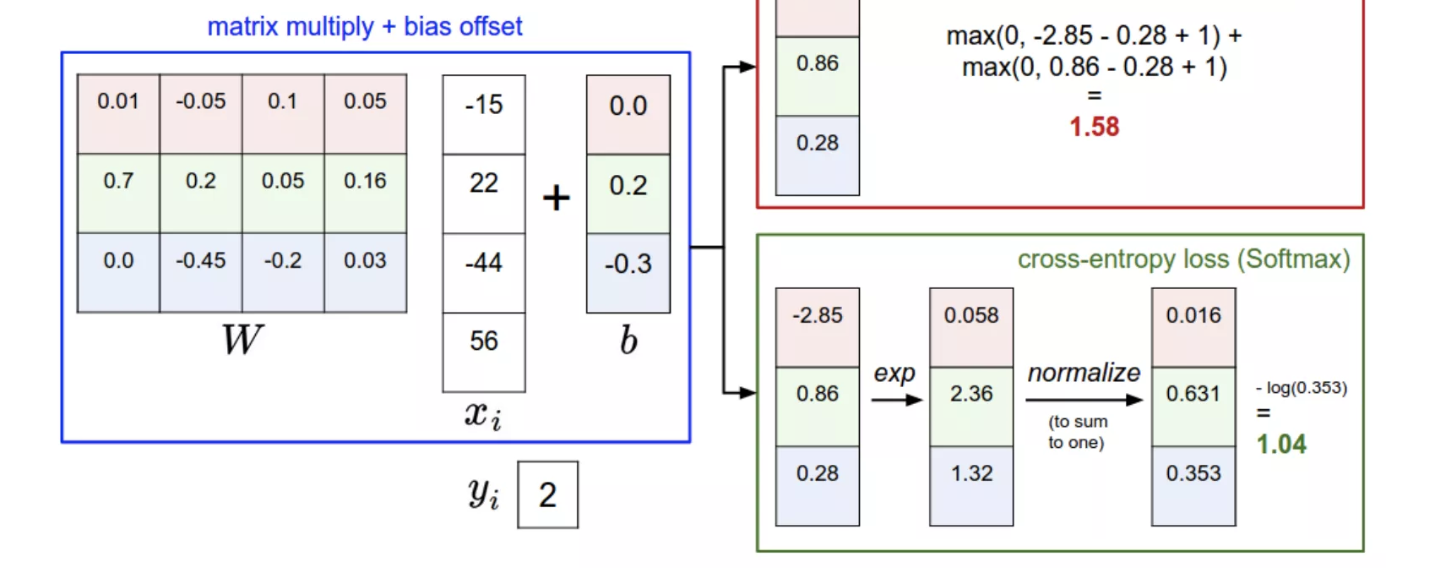

- W의 크기: feature 갯수 by label class 갯수
- Sigmoid: 해당 뉴런의 입력과 weight, bias로 출력 결정
- Softmax: 전체, 즉 다른 뉴런의 출력값과의 상대적인 비교를 통해 최종 출력값 결정 (non-licality)
- Softmax의 특징: 입력을 Sigmoid와 마찬가지로 0-1로 변환하며, 변환된 결과에 대한 합계가 1이 되도록 만듬




### Softmax with cross entropy
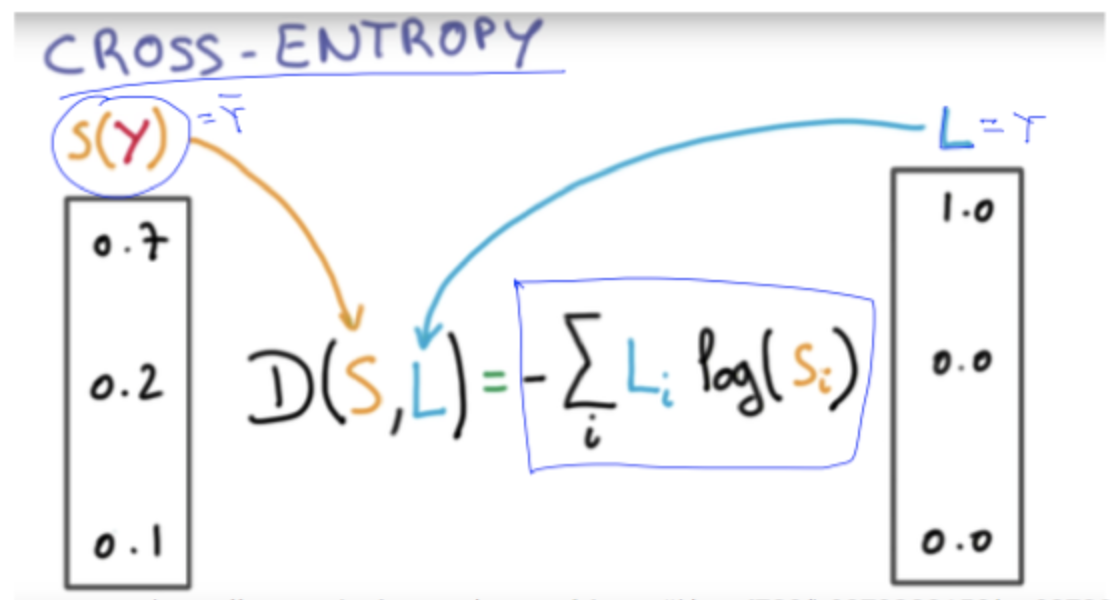
- Softmax를 통해 어떤 확률 분포 추정 가능
- Cross entropy를 통해 추정된 distribution과 실제 distribution의 차이를 비교하여 loss를 계산
- Cross entropy는 두 확률 분포 p와 q 사이의 존재하는 정보량을 계산하는 방법으로 크기가 크다는 것은 정보가 복잡 혹은 두 확률 분포의 차이가 크다라는 뜻. 따라서 두 확률 분포의 차이가 작아지도록 (엔트로피의 크기가 작아지도록) 진행하게 함

In [13]:
NUM_STEPS = 50


g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
        print(w.name)
        print(b.name)
        print(y_pred.name)

    with tf.name_scope('loss') as scope:
        y_pred = tf.sigmoid(y_pred)
        loss = -y_true*tf.log(y_pred) - (1-y_true)*tf.log(1-y_pred)
        loss = tf.reduce_mean(loss)
#         loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred) 
#         loss = tf.reduce_mean(loss)
        print(loss.name)
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        print(train.name)



    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

        print(50, sess.run([w,b]))

inference/weights:0
inference/bias:0
inference/add:0
loss/Mean:0
train/GradientDescent
0 [array([[0.03244257, 0.05947603, 0.01130653]], dtype=float32), -0.024225123]
5 [array([[0.14242327, 0.26270676, 0.0495644 ]], dtype=float32), -0.10721681]
10 [array([[0.20014864, 0.37086046, 0.06960436]], dtype=float32), -0.15146051]
15 [array([[0.23186633, 0.43102762, 0.08061503]], dtype=float32), -0.17602848]
20 [array([[0.24983156, 0.4654845 , 0.08685937]], dtype=float32), -0.19004558]
25 [array([[0.2601956 , 0.48555896, 0.09046869]], dtype=float32), -0.19817495]
30 [array([[0.2662408 , 0.4973718 , 0.09257871]], dtype=float32), -0.2029361]
35 [array([[0.26979053, 0.50436366, 0.09382062]], dtype=float32), -0.20574112]
40 [array([[0.27188352, 0.50851595, 0.0945546 ]], dtype=float32), -0.20739971]
45 [array([[0.27312082, 0.51098675, 0.09498947]], dtype=float32), -0.20838262]
50 [array([[0.2737359 , 0.51222175, 0.09520608]], dtype=float32), -0.20887226]
